In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Customer_Data_yt_csv.csv")

In [ ]:
df = data.copy()

In [ ]:
df.head(2)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN


In [ ]:
df.tail(2)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
6416,17816-ODI,Male,23,No,Odisha,2,10,NaN,Yes,Yes,...,Credit Card,70.15,4480.70,0.0,0,2107.52,6588.22,Stayed,NaN,NaN
6417,34476-TAM,Male,73,No,Tamil Nadu,13,21,NaN,Yes,No,...,Bank Withdrawal,96.85,1235.55,0.0,0,346.84,1582.39,Stayed,NaN,NaN


In [ ]:
df.sample()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
4974,94901-HAR,Male,36,Yes,Haryana,5,32,Deal 2,Yes,Yes,...,Bank Withdrawal,72.8,3249.4,0.0,0,1890.6,5140.0,Stayed,NaN,NaN


This data is regarding a telecom company dealing with customer data and concluding whether a customer is churned or not. It includes the various services opted by the customer like device protection plan,streaming tv services,online security,online backup, premium support,unlimited data etc. It also covers the total refund amount,total monthly charges and charges paid by the customer and atlast reasons are concluded for the customers being churned.

Column Description:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [ ]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
df.shape

(6418, 32)

In [ ]:
df.dtypes

,0
Customer_ID,object
Gender,object
Age,int64
Married,object
State,object
Number_of_Referrals,int64
Tenure_in_Months,int64
Value_Deal,object
Phone_Service,object
Multiple_Lines,object


In [ ]:
df.isnull().mean()*100

,0
Customer_ID,0.000000
Gender,0.000000
Age,0.000000
Married,0.000000
State,0.000000
Number_of_Referrals,0.000000
Tenure_in_Months,0.000000
Value_Deal,55.282019
Phone_Service,0.000000
Multiple_Lines,9.691493


# Data Cleaning
Handling Missing Values




In [ ]:
# flag approach in Total_Extra_Data_Charges column

df['Extra_Data_Flag'] = df['Total_Extra_Data_Charges'].apply(lambda x: 1 if x>0 else 0)
df = df.drop(['Total_Extra_Data_Charges'],axis = 1)


In [ ]:
# dropping Multiple_Lines column
df = df.drop(['Multiple_Lines'],axis = 1)

In [ ]:
# filling Value_Deal column with mode columns
df['Value_Deal'].mode()
df['Value_Deal'] = df['Value_Deal'].fillna(df['Value_Deal'].mode()[0])

In [ ]:
# filling columns with mode values


cols = ['Internet_Type', 'Online_Security', 'Online_Backup',
        'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
        'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# dropping churn_cateogry column
df = df.drop(['Churn_Category'],axis = 1)

In [ ]:
# dropping churn_reason column
df = df.drop(['Churn_Reason'],axis = 1)

In [ ]:
# dropping Total_Refunds column
df = df.drop(['Total_Refunds'],axis = 1)

In [ ]:
df.isnull().mean()*100

,0
Customer_ID,0.0
Gender,0.0
Age,0.0
Married,0.0
State,0.0
Number_of_Referrals,0.0
Tenure_in_Months,0.0
Value_Deal,0.0
Phone_Service,0.0
Internet_Service,0.0


Handling duplicate values


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6413,False
6414,False
6415,False
6416,False


Handling outliers

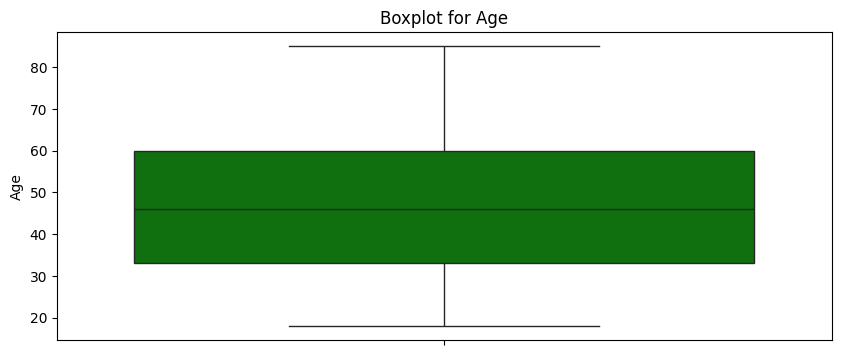

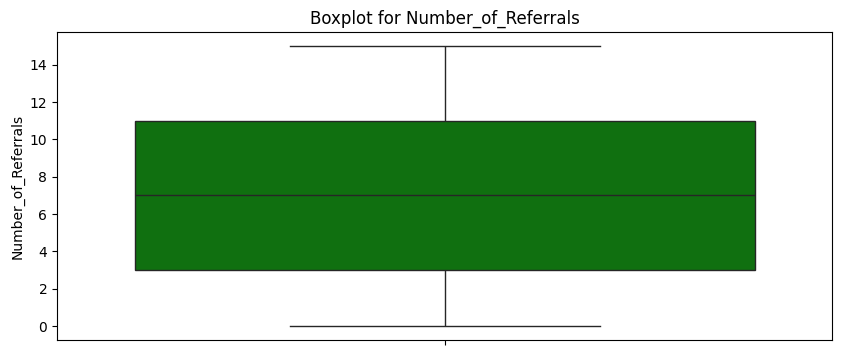

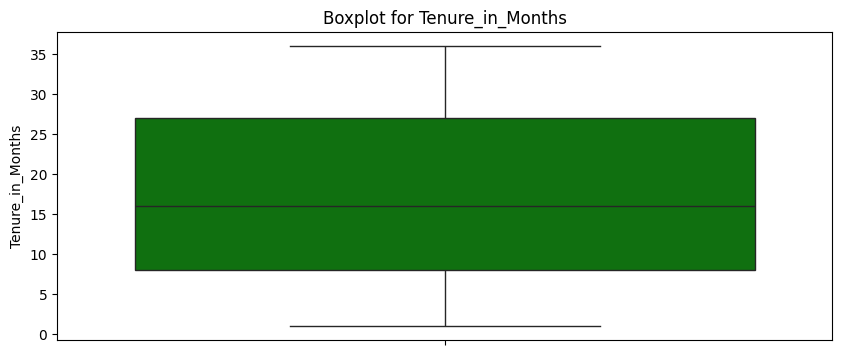

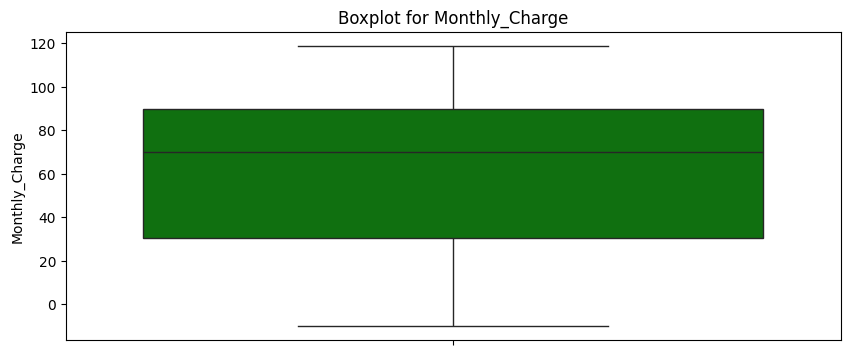

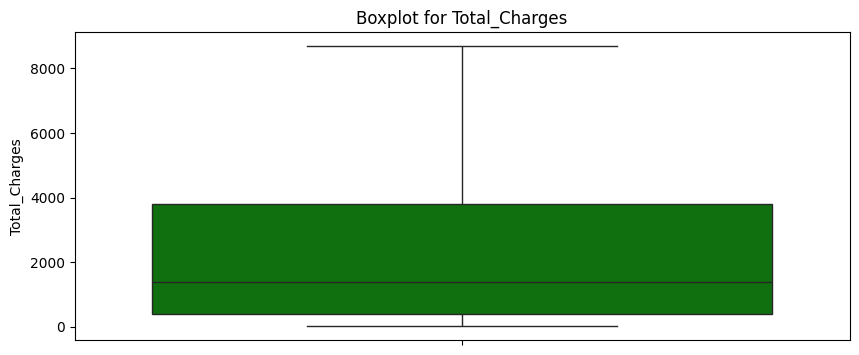

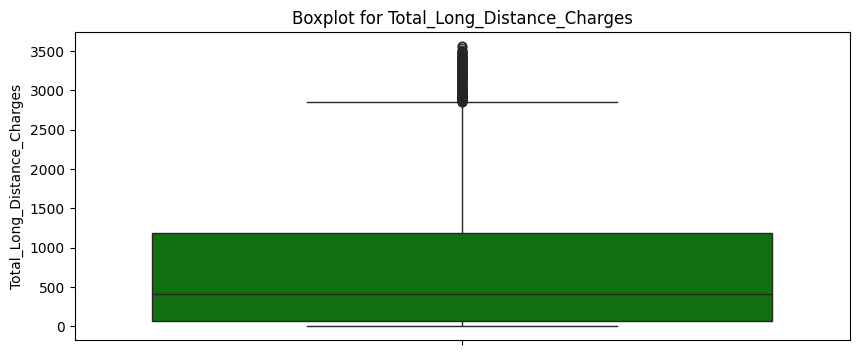

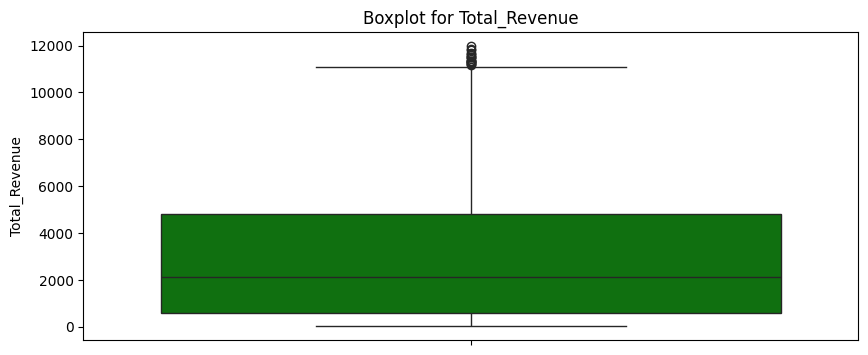

In [ ]:
numerical_cols = ['Age', 'Number_of_Referrals', 'Tenure_in_Months',
                  'Monthly_Charge', 'Total_Charges',
                  'Total_Long_Distance_Charges', 'Total_Revenue']

for col in numerical_cols:
    plt.figure(figsize=(10, 4))


    sns.boxplot(df[col],color='green')


    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col}: {outliers.shape[0]} outliers")

Age: 0 outliers
Number_of_Referrals: 0 outliers
Tenure_in_Months: 0 outliers
Monthly_Charge: 0 outliers
Total_Charges: 0 outliers
Total_Long_Distance_Charges: 193 outliers
Total_Revenue: 19 outliers
Extra_Data_Flag: 654 outliers


In [ ]:
    # outliers in Total_Long_Distance_Charges column
    Q1 = df['Total_Long_Distance_Charges'].quantile(0.25)
    Q3 = df['Total_Long_Distance_Charges'].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df['Total_Long_Distance_Charges'] < lower_limit) | (df['Total_Long_Distance_Charges'] > upper_limit)]

    print(f"   Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"   Lower limit = {lower_limit}, Upper limit = {upper_limit}")
    print(f"   Number of outliers = {outliers.shape[0]}")


    # capping of outliers
    df['Total_Long_Distance_Charges'] = np.where(df['Total_Long_Distance_Charges'] > upper_limit, upper_limit, np.where(df['Total_Long_Distance_Charges']<lower_limit , lower_limit ,df['Total_Long_Distance_Charges']))

   Q1 = 70.80499999999999, Q3 = 1182.9175, IQR = 1112.1125
   Lower limit = -1597.3637499999998, Upper limit = 2851.08625
   Number of outliers = 193


In [ ]:
    # outliers in Monthly_Charge column
    Q1 = df['Monthly_Charge'].quantile(0.25)
    Q3 = df['Monthly_Charge'].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df['Monthly_Charge'] < lower_limit) | (df['Monthly_Charge'] > upper_limit)]

    print(f"   Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"   Lower limit = {lower_limit}, Upper limit = {upper_limit}")
    print(f"   Number of outliers = {outliers.shape[0]}")

    # capping of outliers
    df['Monthly_Charge'] = np.where(df['Monthly_Charge'] > upper_limit, upper_limit, np.where(df['Monthly_Charge']<lower_limit , lower_limit ,df['Monthly_Charge']))

   Q1 = 30.5625, Q3 = 89.75, IQR = 59.1875
   Lower limit = -58.21875, Upper limit = 178.53125
   Number of outliers = 0


In [ ]:
    # outliers in Total_Revenue column
    Q1 = df['Total_Revenue'].quantile(0.25)
    Q3 = df['Total_Revenue'].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df['Total_Revenue'] < lower_limit) | (df['Total_Revenue'] > upper_limit)]

    print(f"   Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"   Lower limit = {lower_limit}, Upper limit = {upper_limit}")
    print(f"   Number of outliers = {outliers.shape[0]}")



    # capping of outliers
    df['Total_Revenue'] = np.where(df['Total_Revenue'] > upper_limit, upper_limit, np.where(df['Total_Revenue']<lower_limit , lower_limit ,df['Total_Revenue']))

   Q1 = 603.7425, Q3 = 4801.5375, IQR = 4197.795
   Lower limit = -5692.95, Upper limit = 11098.23
   Number of outliers = 19


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col}: {outliers.shape[0]} outliers")

Age: 0 outliers
Number_of_Referrals: 0 outliers
Tenure_in_Months: 0 outliers
Monthly_Charge: 0 outliers
Total_Charges: 0 outliers
Total_Long_Distance_Charges: 0 outliers
Total_Revenue: 0 outliers
Extra_Data_Flag: 654 outliers


In [ ]:
# checking the data in Extra_Data_Flag column

df["Extra_Data_Flag"].value_counts()

,count
Extra_Data_Flag,
0,5764
1,654


In [ ]:
df.shape


(6418, 28)

# EDA (Exploratory Data Analysis)

In [ ]:
df['Age'].describe()

,Age
count,6418.000000
mean,47.070739
std,16.703633
min,18.000000
25%,33.000000
50%,46.000000
75%,60.000000
max,85.000000


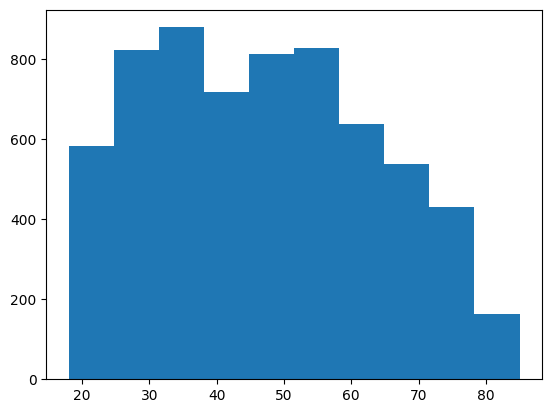

In [ ]:
plt.hist(df['Age'])
plt.show()

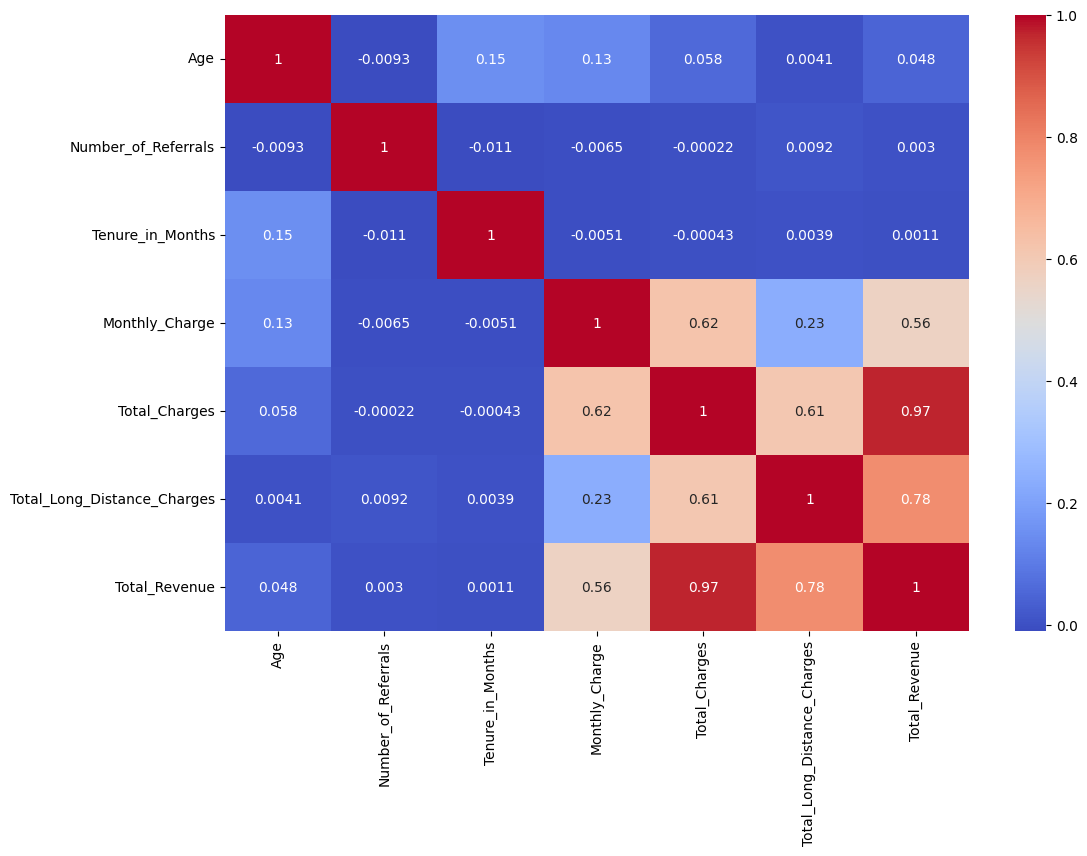

In [ ]:
# heatmap
numerical_cols = ['Age', 'Number_of_Referrals', 'Tenure_in_Months',
                  'Monthly_Charge', 'Total_Charges',  'Total_Long_Distance_Charges', 'Total_Revenue']

# Correlation matrix
corr = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


<Axes: xlabel='Monthly_Charge', ylabel='Count'>

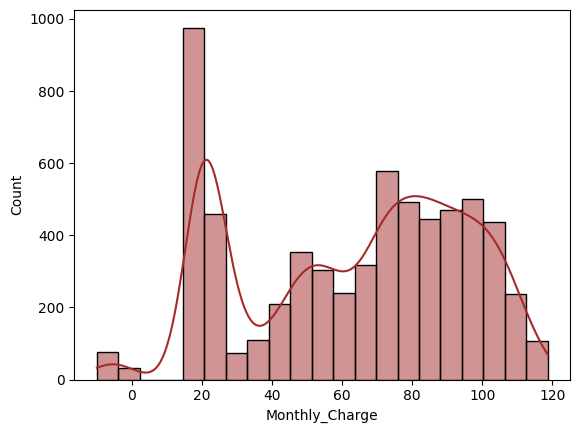

In [ ]:
sns.histplot(data=df['Monthly_Charge'],kde=True , color = "brown")

<Axes: xlabel='Contract', ylabel='count'>

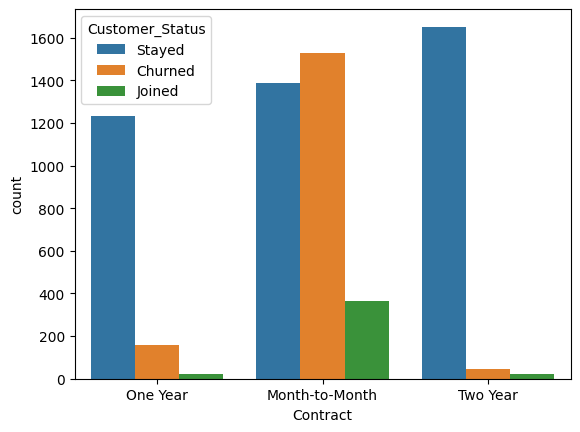

In [ ]:
sns.countplot(x='Contract', hue='Customer_Status', data=df)


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:",categorical_cols)


Categorical Columns: Index(['Customer_ID', 'Gender', 'Married', 'State', 'Value_Deal',
       'Phone_Service', 'Internet_Service', 'Internet_Type', 'Online_Security',
       'Online_Backup', 'Device_Protection_Plan', 'Premium_Support',
       'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Customer_Status'],
      dtype='object')


In [ ]:
for col in categorical_cols:
    print(df[col].value_counts())
    print("  ")

Customer_ID
34476-TAM    1
19877-DEL    1
47624-TAM    1
62989-TAM    1
45697-KER    1
            ..
84741-MAH    1
32750-TEL    1
28544-TAM    1
59787-KAR    1
25063-WES    1
Name: count, Length: 6418, dtype: int64
  
Gender
Female    4048
Male      2370
Name: count, dtype: int64
  
Married
No     3223
Yes    3195
Name: count, dtype: int64
  
State
Uttar Pradesh      629
Tamil Nadu         600
Maharashtra        504
Karnataka          470
Haryana            398
Andhra Pradesh     395
West Bengal        368
Punjab             342
Bihar              336
Gujarat            335
Jammu & Kashmir    320
Madhya Pradesh     288
Telangana          281
Rajasthan          259
Kerala             200
Odisha             152
Assam              139
Delhi              127
Jharkhand          113
Uttarakhand         62
Chhattisgarh        59
Puducherry          41
Name: count, dtype: int64
  
Value_Deal
Deal 2    4306
Deal 5     738
Deal 4     540
Deal 1     469
Deal 3     365
Name: count, dtype: int64


In [ ]:
print("\n----- Encoding Recommendations -----")
for col in categorical_cols:
    unique_vals = df[col].nunique()
    if unique_vals == 2:
        print(f"{col}:  Label Encoding (binary)")
    elif unique_vals > 2:
        print(f"{col}:  One-Hot Encoding (multi-category)")


----- Encoding Recommendations -----
Customer_ID:  One-Hot Encoding (multi-category)
Gender:  Label Encoding (binary)
Married:  Label Encoding (binary)
State:  One-Hot Encoding (multi-category)
Value_Deal:  One-Hot Encoding (multi-category)
Phone_Service:  Label Encoding (binary)
Internet_Service:  Label Encoding (binary)
Internet_Type:  One-Hot Encoding (multi-category)
Online_Security:  Label Encoding (binary)
Online_Backup:  Label Encoding (binary)
Device_Protection_Plan:  Label Encoding (binary)
Premium_Support:  Label Encoding (binary)
Streaming_TV:  Label Encoding (binary)
Streaming_Movies:  Label Encoding (binary)
Streaming_Music:  Label Encoding (binary)
Unlimited_Data:  Label Encoding (binary)
Contract:  One-Hot Encoding (multi-category)
Paperless_Billing:  Label Encoding (binary)
Payment_Method:  One-Hot Encoding (multi-category)
Customer_Status:  One-Hot Encoding (multi-category)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_to_encode = ['Internet_Type', 'Online_Security', 'Online_Backup',
                  'Device_Protection_Plan', 'Premium_Support',
                  'Streaming_TV', 'Streaming_Movies', 'Streaming_Music',
                  'Unlimited_Data', 'Paperless_Billing', 'Customer_Status']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.select_dtypes(include=['object']).columns


Index(['Customer_ID', 'Gender', 'Married', 'State', 'Value_Deal',
       'Phone_Service', 'Internet_Service', 'Contract', 'Payment_Method'],
      dtype='object')


# Model Creation

In [ ]:
# Step 1: Separate features and target
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

# Step 2: Drop columns that are not useful or are IDs/text
X = X.drop(['Customer_ID', 'State'], axis=1)

# Step 3: Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Internet_Type'] = le.fit_transform(X_train['Internet_Type'])
X_test['Internet_Type'] = le.transform(X_test['Internet_Type'])


In [ ]:
# Convert 'Yes'/'No' type columns to numeric
replace_map = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'None': 0
}

cols_to_fix = ['Online_Security', 'Online_Backup', 'Device_Protection_Plan',
               'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
               'Streaming_Music', 'Unlimited_Data', 'Paperless_Billing']

for col in cols_to_fix:
    X_train[col] = X_train[col].replace(replace_map)
    X_test[col] = X_test[col].replace(replace_map)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix : ",confusion_matrix(y_test, y_pred))
print("Classification Report ",classification_report(y_test, y_pred))


Accuracy: 0.7834890965732088
Confusion Matrix :  [[175  26 118]
 [ 23  30  36]
 [ 74   1 801]]
Classification Report                precision    recall  f1-score   support

           0       0.64      0.55      0.59       319
           1       0.53      0.34      0.41        89
           2       0.84      0.91      0.87       876

    accuracy                           0.78      1284
   macro avg       0.67      0.60      0.63      1284
weighted avg       0.77      0.78      0.77      1284

